# Sankey

In [1]:
import pandas as pd

In [24]:
df = pd.read_csv("/Users/carboni/Downloads/test_sankey.csv")

In [3]:
df

,issueLabel,url,circulation
0,L'Esprit nouveau (Paris. 1920),https://gallica.bnf.fr/iiif/ark:/12148/bpt6k10...,Cahiers d'art (Paris)
1,L'Esprit nouveau (Paris. 1920),https://gallica.bnf.fr/iiif/ark:/12148/bpt6k10...,Die Form
2,L'Esprit nouveau (Paris. 1920),https://gallica.bnf.fr/iiif/ark:/12148/bpt6k10...,Cahiers d'art (Paris)
3,L'Esprit nouveau (Paris. 1920),https://gallica.bnf.fr/iiif/ark:/12148/bpt6k10...,Die Form
4,L'Esprit nouveau (Paris. 1920),https://gallica.bnf.fr/iiif/ark:/12148/bpt6k10...,La Révolution surréaliste
5,L'Esprit nouveau (Paris. 1920),https://gallica.bnf.fr/iiif/ark:/12148/bpt6k10...,Action: cahiers individualistes de philosophie...
6,Cahiers d'art (Paris),https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,Cahiers d'art (Paris)
7,Cahiers d'art (Paris),https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,Blok
8,Cahiers d'art (Paris),https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,L'Esprit nouveau (Paris. 1920)
9,Cahiers d'art (Paris),https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,Die Form


In [4]:
df1 = df.groupby(['url','issueLabel'])['circulation'].count().reset_index()

In [5]:
df1.columns = ['source','target','value']
df1

,source,target,value
0,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k10...,L'Esprit nouveau (Paris. 1920),3
1,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k10...,L'Esprit nouveau (Paris. 1920),3
2,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,Cahiers d'art (Paris),4


In [6]:
df2 = df.groupby(['issueLabel','circulation'])['url'].count().reset_index()
df2.columns = ['source','target','value']
df2

,source,target,value
0,Cahiers d'art (Paris),Blok,1
1,Cahiers d'art (Paris),Cahiers d'art (Paris),1
2,Cahiers d'art (Paris),Die Form,1
3,Cahiers d'art (Paris),L'Esprit nouveau (Paris. 1920),1
4,L'Esprit nouveau (Paris. 1920),Action: cahiers individualistes de philosophie...,1
5,L'Esprit nouveau (Paris. 1920),Cahiers d'art (Paris),2
6,L'Esprit nouveau (Paris. 1920),Die Form,2
7,L'Esprit nouveau (Paris. 1920),La Révolution surréaliste,1


In [7]:
links = pd.concat([df1, df2], axis=0)
links

,source,target,value
0,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k10...,L'Esprit nouveau (Paris. 1920),3
1,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k10...,L'Esprit nouveau (Paris. 1920),3
2,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,Cahiers d'art (Paris),4
0,Cahiers d'art (Paris),Blok,1
1,Cahiers d'art (Paris),Cahiers d'art (Paris),1
2,Cahiers d'art (Paris),Die Form,1
3,Cahiers d'art (Paris),L'Esprit nouveau (Paris. 1920),1
4,L'Esprit nouveau (Paris. 1920),Action: cahiers individualistes de philosophie...,1
5,L'Esprit nouveau (Paris. 1920),Cahiers d'art (Paris),2
6,L'Esprit nouveau (Paris. 1920),Die Form,2


In [8]:
unique_source_target = list(pd.unique(links[['source','target']].values.ravel('k')))

In [10]:
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}
mapping_dict

{'https://gallica.bnf.fr/iiif/ark:/12148/bpt6k1073372j/f916/242,1132,2138,1555/full/0/default.jpg': 0,
 'https://gallica.bnf.fr/iiif/ark:/12148/bpt6k10733766/f190/306,515,1980,2459/full/0/default.jpg': 1,
 'https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97952556/f396/437,1646,1918,2782/full/0/default.jpg': 2,
 "Cahiers d'art (Paris)": 3,
 "L'Esprit nouveau (Paris. 1920)": 4,
 'Blok': 5,
 'Die Form': 6,
 'Action: cahiers individualistes de philosophie et d’art': 7,
 'La Révolution surréaliste': 8}

In [11]:
links['source'] = links['source'].map(mapping_dict)
links['target'] = links['target'].map(mapping_dict)
links

,source,target,value
0,0,4,3
1,1,4,3
2,2,3,4
0,3,5,1
1,3,3,1
2,3,6,1
3,3,4,1
4,4,7,1
5,4,3,2
6,4,6,2


In [12]:
links_dict = links.to_dict(orient='list')
links_dict

{'source': [0, 1, 2, 3, 3, 3, 3, 4, 4, 4, 4],
 'target': [4, 4, 3, 5, 3, 6, 4, 7, 3, 6, 8],
 'value': [3, 3, 4, 1, 1, 1, 1, 1, 2, 2, 1]}

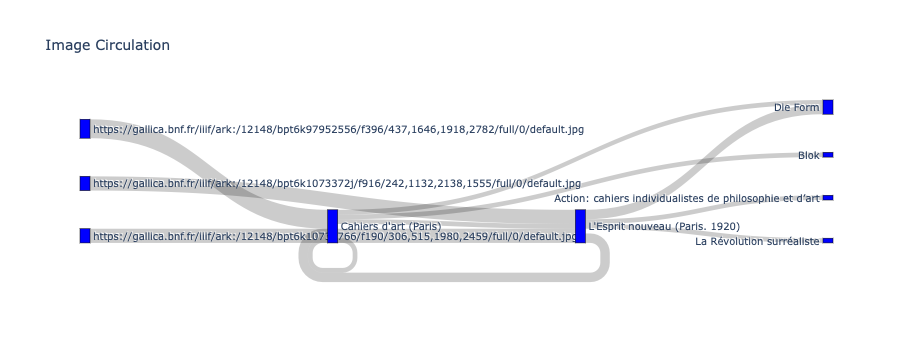

In [21]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 25,
        thickness=10,
        line=dict(color='black', width=0.5),
        label = unique_source_target,
        color='blue'
        
    ),
    link = dict(
        source= links_dict['source'],
        target = links_dict['target'],
        value = links_dict['value']
    )
    
)
])
fig.update_layout(title='Image Circulation', font_size=10)
fig.show()
fig.write_html('viz/sankey_test.html', auto_open=True)